In [1]:
using WindTunnelFlow
using Plots

In [2]:
params = Dict()
params["Re"] = 200
params["grid Re"] = 4.0
params["wind tunnel length"] = 6.0
params["wind tunnel heigth"] = 3.0
params["freestream speed"] = 1.0
params["freestream angle"] = 0.0
t_final = 5.0
xlim = (-4.0,4.0)
ylim = (-2.0,2.0)
g = setup_grid(xlim,ylim,params)

PhysicalGrid{2}((416, 208), (208, 104), 0.02, ((-4.14, 4.14), (-2.06, 2.06)))

In [3]:
α = 0 # degrees
Δs = surface_point_spacing(g,params)
airfoil = NACA4(0.0,0.0,0.12,300)
body = SplinedBody(airfoil.x,airfoil.y,Δs)
T = RigidTransform((0.0,0.0),-α*π/180)
T(body) # transform the body to the current configuration

Basic pointwise-specified body with 72 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


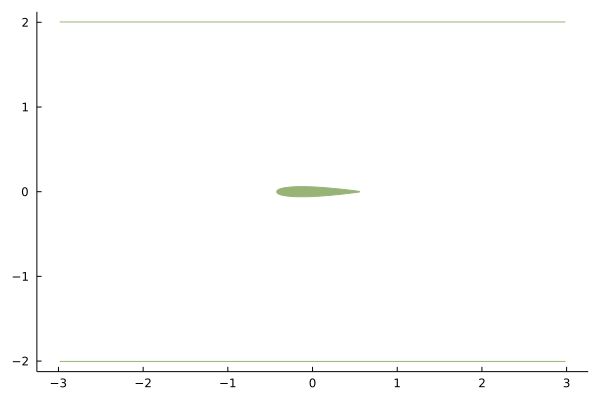

In [4]:
wt_walls = create_windtunnelwalls(g,params)
plot(body)
plot!(wt_walls)

In [5]:
prob = WindTunnelProblem(g,body,phys_params=params;timestep_func=ViscousFlow.DEFAULT_TIMESTEP_FUNC,
                                   bc=ViscousFlow.get_bc_func(nothing))
sys = construct_system(prob);
u0 = init_sol(sys)
tspan = (0.0,t_final)
integrator = init(u0,tspan,sys);

In [6]:
step!(integrator,t_final)
sol = integrator.sol;
fx, fy = force(sol,sys,1);

┌ Info: Saved animation to 
│   fn = /Users/beckers/.julia/dev/WindTunnelFlow/examples/tmp.gif
└ @ Plots /Users/beckers/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/beckers/.julia/dev/WindTunnelFlow/examples/tmp.gif")
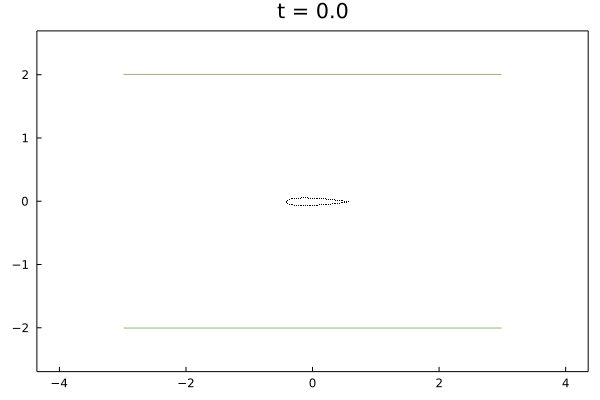

In [8]:
anim = @animate for i in 1:10:length(integrator.sol.t)
    plot(integrator.sol.u[i].x[1],sys,clim=(-15,15),color=cgrad(:RdBu, rev = true),levels=range(-15,15,length=30),title="t = $(round(integrator.sol.t[i]; digits=2))")
    plot!(wt_walls,xlims=xlims,ylims=ylims)
end
gif(anim)